In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
# Load data
url = 'https://github.com/JeremyKrick/Team-Project-Statistics-for-AI/blob/main/Data_Preprocesssing/Data_Preprocessing.xlsx?raw=true'
df = pd.read_excel(url, index_col=0, sheet_name='wdbc') # Use wdbc data file
df['Diagnosis'] = df['Diagnosis'].map({'M' : 1, 'B': 0}) # Malignant : 1; Benign : 0

df.head()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothnes1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothnes3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
ID,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Diagnosis           569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothnes1          569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothnes2          569 non-null    float64
 16  c

In [5]:
df.describe()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothnes1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothnes3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.Diagnosis.value_counts()

0    357
1    212
Name: Diagnosis, dtype: int64

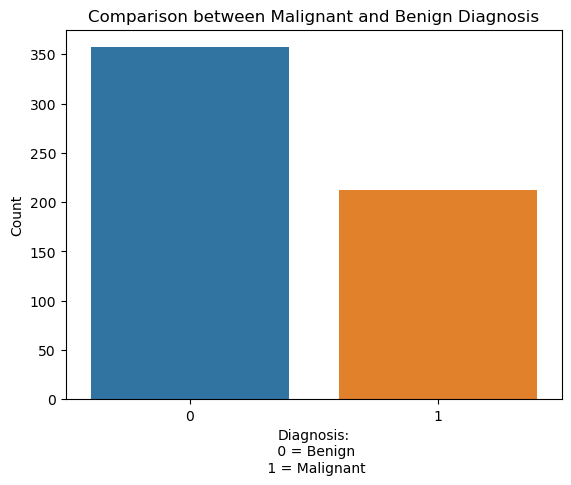

In [7]:
# Plot the count of Malignant and Benign diagnosis
sns.countplot(x=df["Diagnosis"])
plt.title("Comparison between Malignant and Benign Diagnosis")
plt.xlabel("Diagnosis:\n 0 = Benign\n 1 = Malignant")
plt.ylabel("Count")
plt.show()

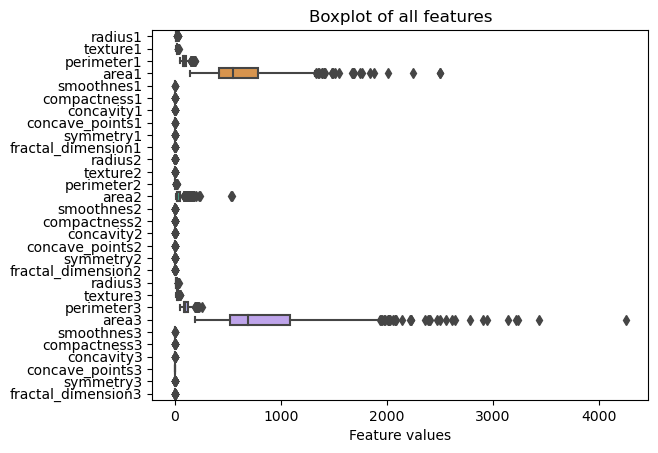

In [8]:
y = df.Diagnosis # Labels of the data
cancer_features = df.drop(columns='Diagnosis', axis=1)

# Create box plot
box_plot = sns.boxplot(data=cancer_features, orient='h')
box_plot.set_xlabel("Feature values")
box_plot.set_title("Boxplot of all features")
plt.show()

In [9]:
# Z-score normalize data
data_n_2 = (cancer_features - cancer_features.mean()) / (cancer_features.std())

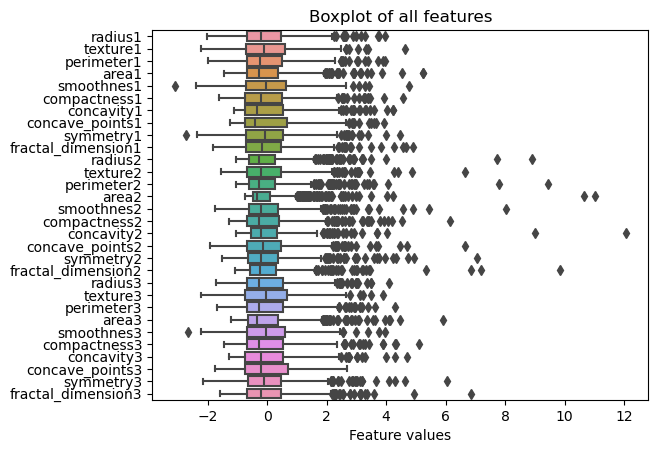

In [10]:
# NORMALIZED
# Create box plot
box_plot = sns.boxplot(data=data_n_2, orient='h')
box_plot.set_xlabel("Feature values")
box_plot.set_title("Boxplot of all features")
plt.show()

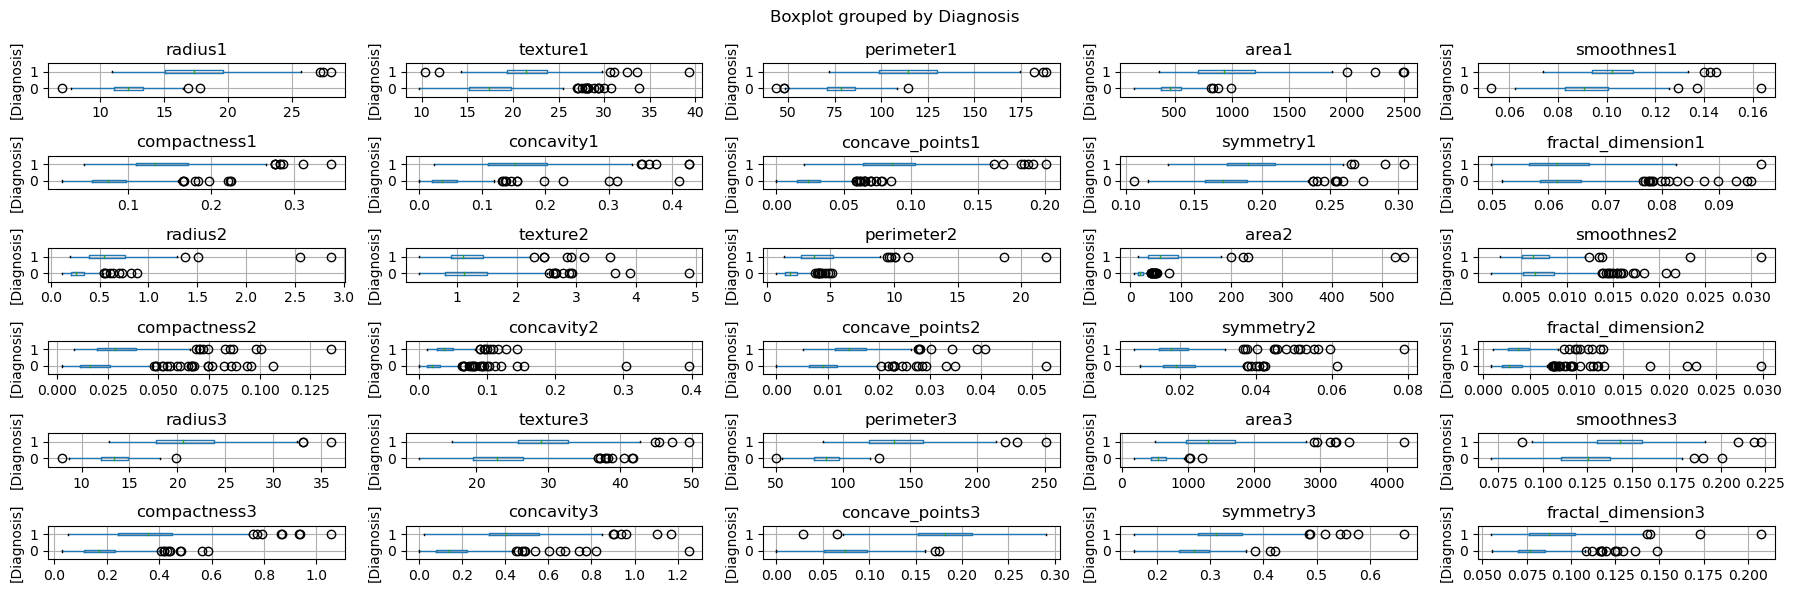

In [11]:
# Create box plots of each feature to analyse further
fig, axes = plt.subplots(6, 5, figsize=(18, 6))

for c, ax in zip(cancer_features.columns, axes.ravel()):
    df[[c, 'Diagnosis']].boxplot(vert=False, by='Diagnosis', ax=ax)
    ax.set_xlabel("")
plt.tight_layout()
# save boxplots as .png file
plt.savefig('boxplots.png', dpi=300, bbox_inches='tight')

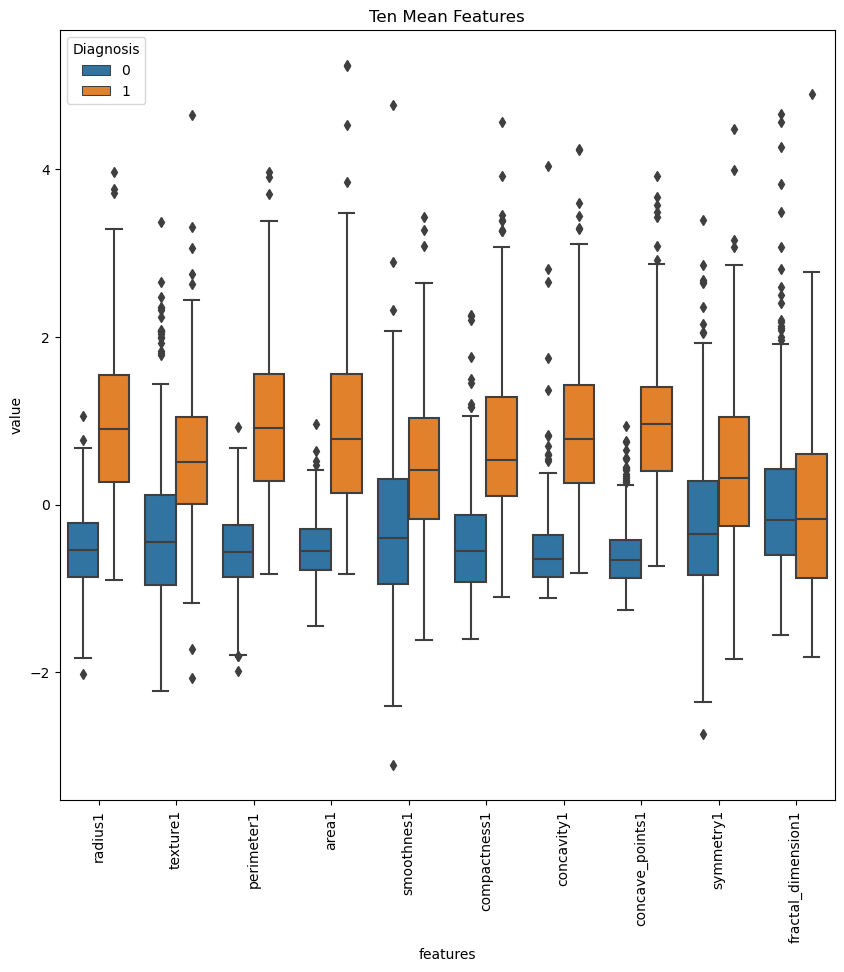

<Figure size 640x480 with 0 Axes>

In [12]:
data_dia = y
data = cancer_features
# First ten features - Normalized
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="Diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(data=data, orient='v', x='features', y='value', hue='Diagnosis')
plt.xticks(rotation=90)
plt.title('Ten Mean Features')
plt.show()
# save boxplots as .png file
plt.savefig('Norm_boxplot_10.png', dpi=300, bbox_inches='tight')

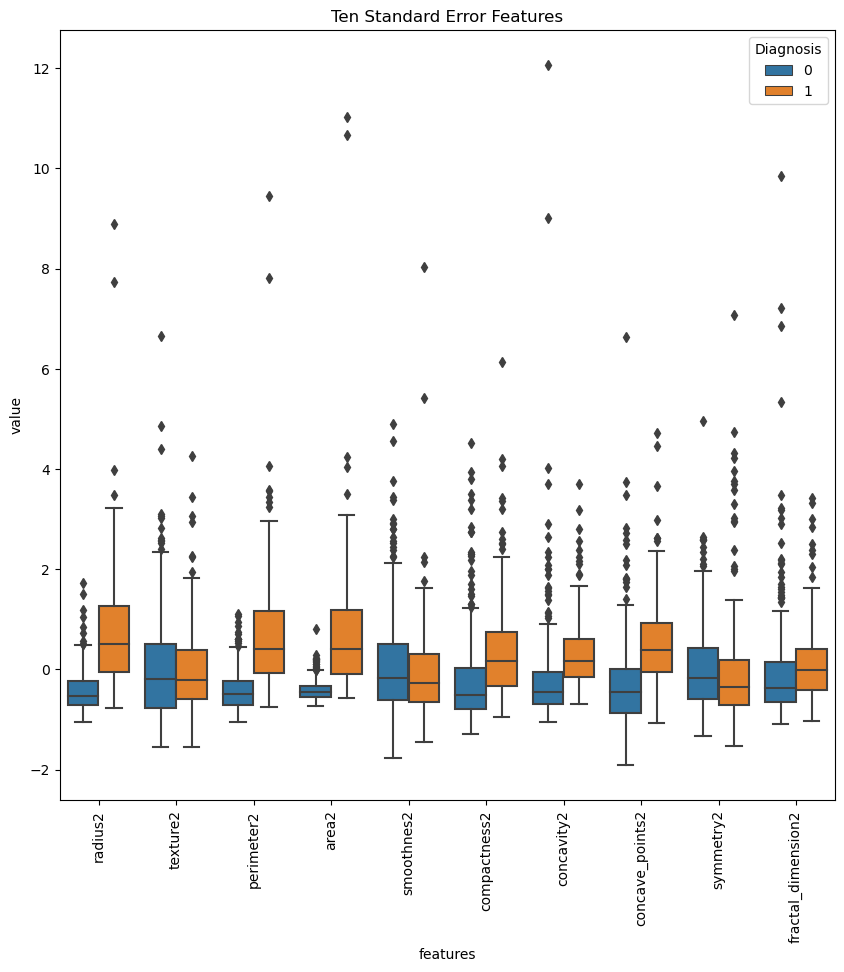

<Figure size 640x480 with 0 Axes>

In [13]:
# Next ten features - Normalized
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="Diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(data=data, orient='v', x='features', y='value', hue='Diagnosis')
plt.xticks(rotation=90)
plt.title('Ten Standard Error Features')
plt.show()
# save boxplots as .png file
plt.savefig('Norm_boxplot_20.png', dpi=300, bbox_inches='tight')

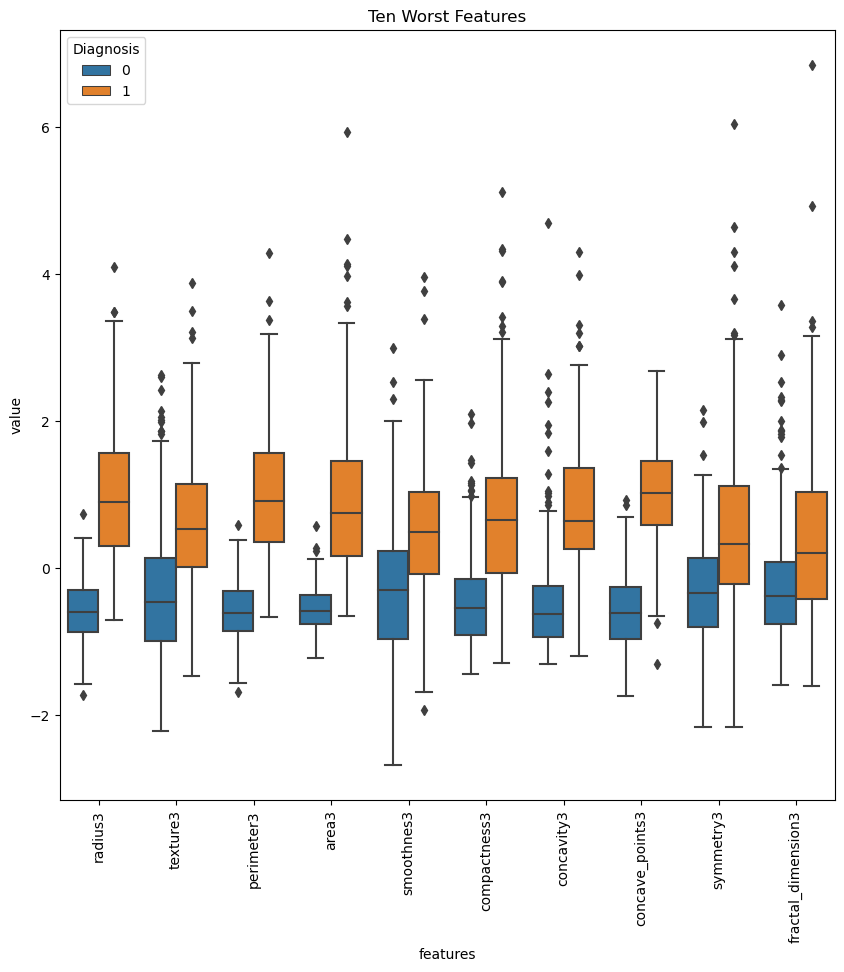

<Figure size 640x480 with 0 Axes>

In [14]:
# Last ten features - Normalized
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="Diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(data=data, orient='v', x='features', y='value', hue='Diagnosis')
plt.xticks(rotation=90)
plt.title('Ten Worst Features')
plt.show()
# save boxplots as .png file
plt.savefig('Norm_boxplot_30.png', dpi=300, bbox_inches='tight')

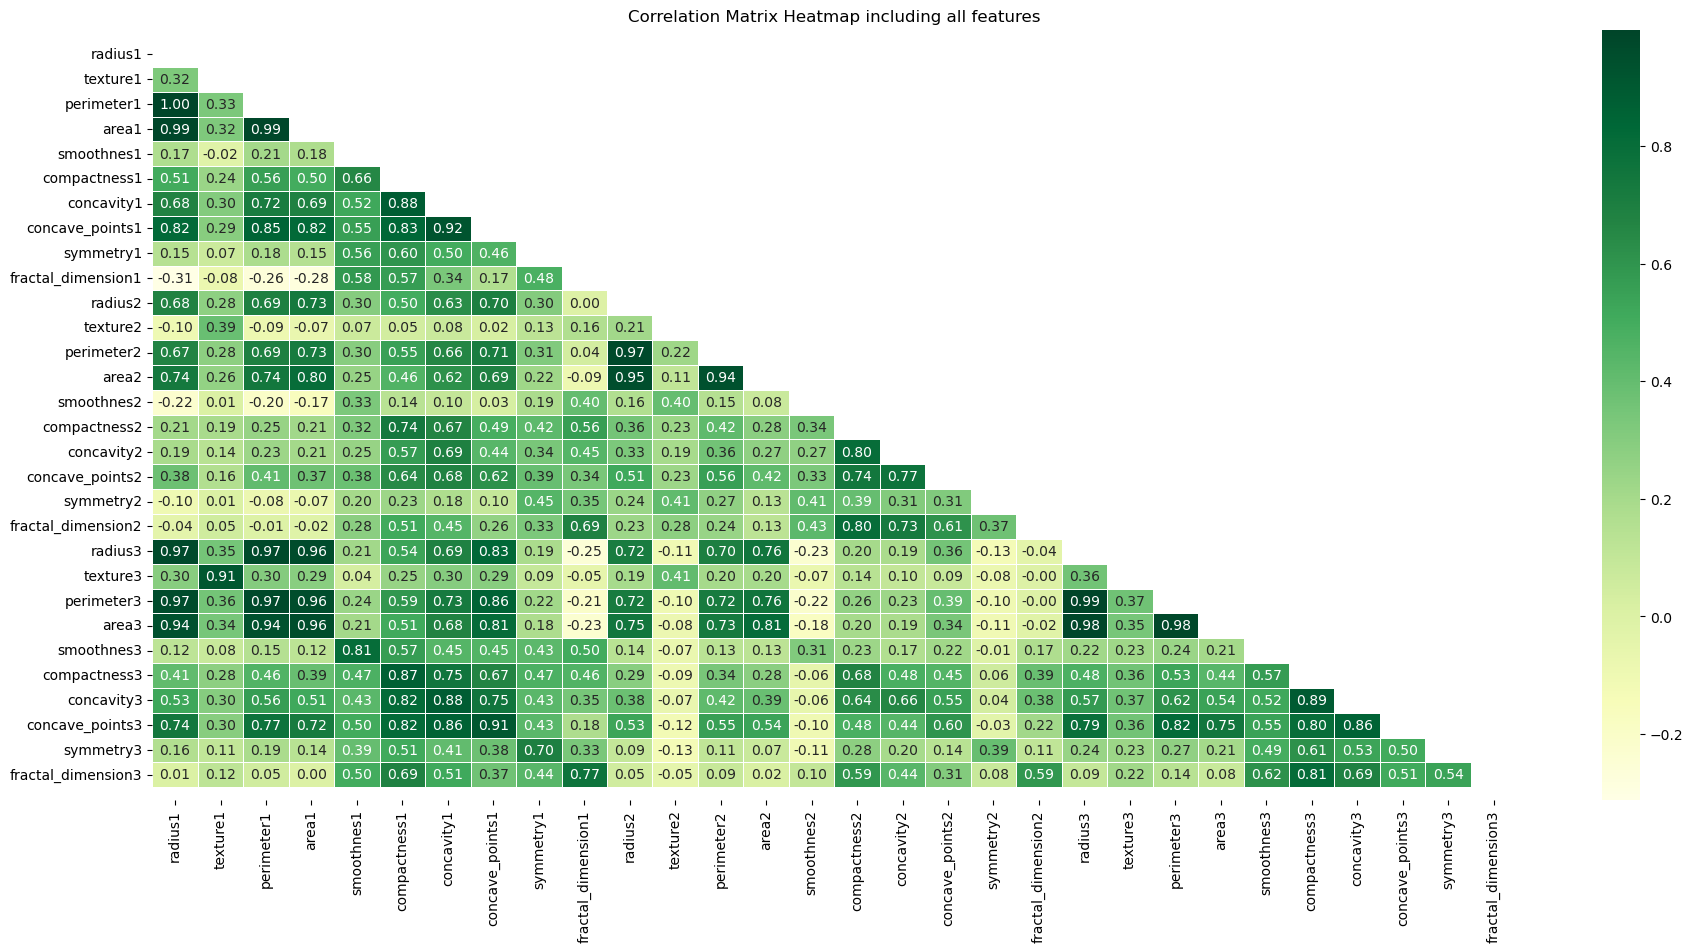

In [15]:
# Correlation Matrix using normalized data
corr_matrix = data_n_2.corr(numeric_only=False)  

# Mask for Heatmap
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(corr_matrix)] = True

# Correlation Matrix Heatmap including all features
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
ax.set_title("Correlation Matrix Heatmap including all features");

# save heatmap as .png file
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [ ]:
# Example of exporting wpbc data to xlsx file format
column_names = ["ID number", "Outcome", "Time", 
                "radius1","texture1","perimeter1","area1","smoothness1","compactness1", "concavity1", "concave points1", "symmetry1", "fractal dimension1",
                "radius2","texture2","perimeter2","area2","smoothness2","compactness2", "concavity2", "concave points2", "symmetry2", "fractal dimension2", 
                "radius3","texture3","perimeter3","area3","smoothness3","compactness3", "concavity3", "concave points3", "symmetry3", "fractal dimension3", 
                "Tumor size","Lymph node status"]
url2 = 'https://raw.githubusercontent.com/JeremyKrick/Team-Project-Statistics-for-AI/main/Data/wpbc.data'
df2 = pd.read_csv(url2, index_col=0, names=column_names)
df2.head()
#df2.to_excel("output.xlsx", sheet_name='wpbc')